In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [74]:
df = pd.read_csv("MANAGE.csv")

In [75]:
df

,dir,label,title,color,decripsion,image_dir
0,1f6ac96bdbcf41888b7daf2d00173c5c_9366.jpg,ao_adidas,Áo Thun Graphic Badge of Sport In Hoa,Black,Chiếc áo thun phong cách biểu tượng với điểm n...,ao_adidas/1f6ac96bdbcf41888b7daf2d00173c5c_936...
1,9183cfc4ec0141d0b0bbdef51bd6ec68_9366.jpg,ao_adidas,Áo Khoác Own the Run,White,Chiếc áo khoác chạy bộ cản gió có sử dụng chất...,ao_adidas/9183cfc4ec0141d0b0bbdef51bd6ec68_936...
2,c4778cff7cc24601ba15af4600f3ca4a_9366.jpg,ao_adidas,Áo Thun Oversize Yoga Studio,Preloved Red,Chiếc áo thun yoga có nguồn gốc tự nhiên.Mạnh ...,ao_adidas/c4778cff7cc24601ba15af4600f3ca4a_936...
3,a593596b4ea94574beec630314f4a5e0_9366.jpg,ao_adidas,Áo Tank Top Jersey Cotton One Basketball,Cream White Mel.,Chiếc áo thun cotton tôn vinh bộ môn bóng rổ.S...,ao_adidas/a593596b4ea94574beec630314f4a5e0_936...
4,00c9cbf1eb044c6a9934afaa00de8e5b_9366.jpg,ao_adidas,Áo Thun Khóa Kéo Lửng Dài Tay Collective Power,Clay Strata,Chiếc áo chạy bộ ôm sát với các chi tiết xếp n...,ao_adidas/00c9cbf1eb044c6a9934afaa00de8e5b_936...
...,...,...,...,...,...,...
7152,f8b32ca0-5fa3-a700-3067-001931340ae4.jpg,quan_yame,Quần Dài Lưng Thun Ống Đứng Vải Denim Co Giãn ...,Xanh Rêu,\nMô tả sản phẩm\nQuần Dài Trouser Đơn Giản Y ...,quan_yame/f8b32ca0-5fa3-a700-3067-001931340ae4...
7153,77d0962a-d3ec-af00-bbd5-00194cb1f951.jpg,quan_yame,Quần Dài Lưng Gài Ống Đứng Vải Denim Co Giãn T...,Nâu Đậm,\nMô tả sản phẩm\nQuần Dài Vải Tối Giản M9Chất...,quan_yame/77d0962a-d3ec-af00-bbd5-00194cb1f951...
7154,421e0533-017a-3801-d6a5-001999bf4794.jpg,quan_yame,Quần Jean Lưng Gài Ống Đứng Vải Cotton Co Giãn...,Xanh Đậm,\nMô tả sản phẩm\nQuần Jean Slimfit 12VAHDT Vạ...,quan_yame/421e0533-017a-3801-d6a5-001999bf4794...
7155,315764eb-5068-3b00-ad44-001af08675fb.jpg,quan_yame,Quần Jean Lưng Gài Ống Đứng Vải Cotton Co Giãn...,Xanh Dương,\nMô tả sản phẩm\nChất liệu: Jean Cotton Spand...,quan_yame/315764eb-5068-3b00-ad44-001af08675fb...


In [76]:
# Kiểm tra thông tin dữ liệu
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7157 entries, 0 to 7156
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   dir         7157 non-null   object
 1   label       7157 non-null   object
 2   title       7157 non-null   object
 3   color       7157 non-null   object
 4   decripsion  6933 non-null   object
 5   image_dir   7157 non-null   object
dtypes: object(6)
memory usage: 335.6+ KB
None


In [77]:
print(df.describe())

                                             dir      label  \
count                                       7157       7157   
unique                                      6478          6   
top     5a64ee7e-4949-a001-53b1-001a6e16e53d.jpg  ao_adidas   
freq                                           2       2099   

                           title  color  \
count                       7157   7157   
unique                      1771    526   
top     Áo Thun Cổ Tròn Ngắn Tay  Black   
freq                          42    790   

                                               decripsion  \
count                                                6933   
unique                                               1809   
top     \nMô tả sản phẩm\nChất liệu: Jean Cotton Spand...   
freq                                                   50   

                                                image_dir  
count                                                7157  
unique                                    

In [78]:
# Kiểm tra các giá trị thiếu
missing_values = df.isnull().sum()
print("Số lượng giá trị thiếu mỗi cột:\n", missing_values)


Số lượng giá trị thiếu mỗi cột:
 dir             0
label           0
title           0
color           0
decripsion    224
image_dir       0
dtype: int64


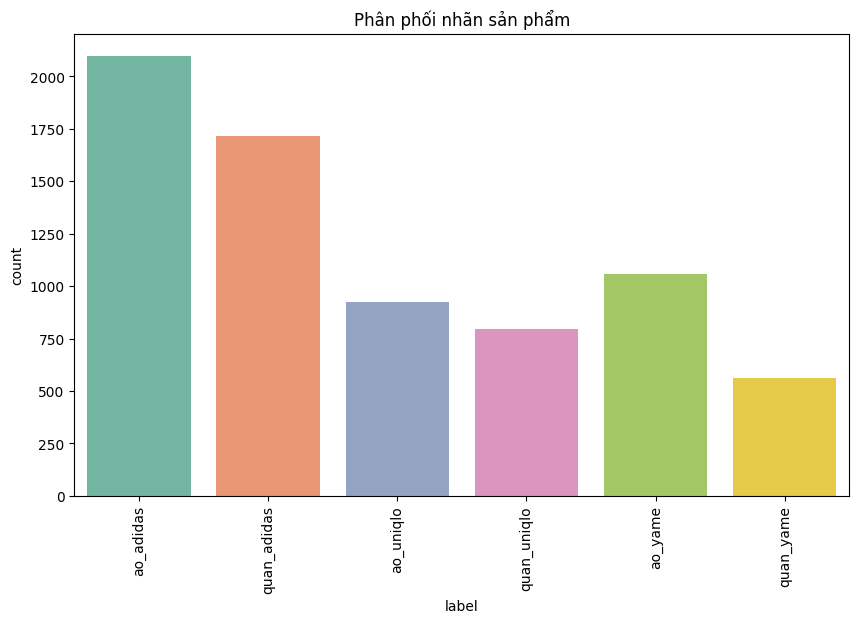

In [79]:
# Phân phối nhãn sản phẩm
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='label', palette='Set2')
plt.title('Phân phối nhãn sản phẩm')
plt.xticks(rotation=90)
plt.show()


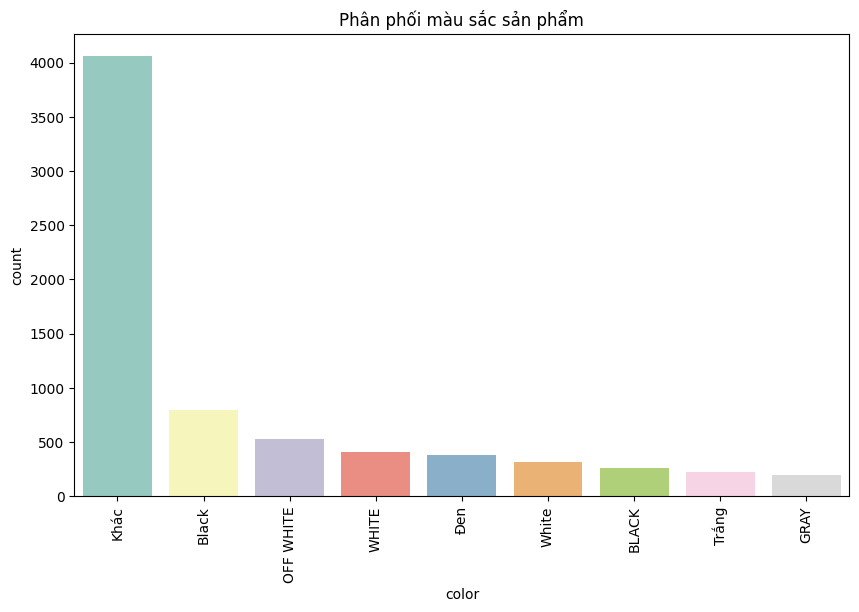

In [80]:
color_counts = df['color'].value_counts()

# Giả sử bạn muốn giữ lại  màu phổ biến nhất
top_colors = color_counts.head(8).index

# Thay thế các màu ít phổ biến bằng 'Khác'
df['color'] = df['color'].apply(lambda x: x if x in top_colors else 'Khác')

# Tính lại tần suất của các màu sắc sau khi thay thế
color_counts_sorted = df['color'].value_counts().sort_values(ascending=False)

# Vẽ đồ thị với tần suất đã được sắp xếp
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='color', palette='Set3', order=color_counts_sorted.index)
plt.title('Phân phối màu sắc sản phẩm')
plt.xticks(rotation=90)
plt.show()


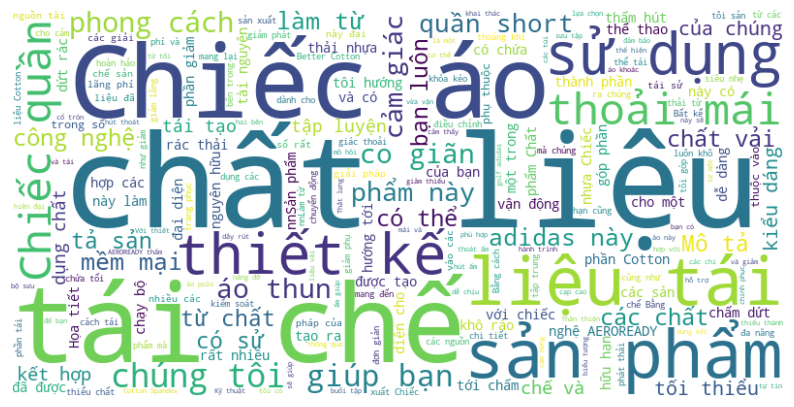

In [81]:
# Kết hợp tất cả mô tả thành một chuỗi
text = ' '.join(df['decripsion'].dropna())

# Tạo WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Hiển thị WordCloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [82]:
"""nltk.download('punkt')
# Tạo danh sách stopwords thủ công (ví dụ)
stop_words = set([
    'và', 'là', 'của', 'để', 'trong', 'với', 'này', 'có', 'như', 'cho', 'một', 'đã', 'bạn', 'tôi', 'cái', 'này', 
    'mình', 'được', 'không', 'được', 'nếu', 'thì', 'cũng', 'vì', 'theo', 'chúng', 'ta', 'đến', 'khi', 'nào', 'ở', 'lúc'
])

# Tách từ và loại bỏ stopwords
tokens = word_tokenize(text)
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

# Tạo DataFrame các từ phổ biến
word_freq = pd.Series(filtered_tokens).value_counts()
print(word_freq.head(20))  # In ra 20 từ phổ biến nhất
"""

"nltk.download('punkt')\n# Tạo danh sách stopwords thủ công (ví dụ)\nstop_words = set([\n    'và', 'là', 'của', 'để', 'trong', 'với', 'này', 'có', 'như', 'cho', 'một', 'đã', 'bạn', 'tôi', 'cái', 'này', \n    'mình', 'được', 'không', 'được', 'nếu', 'thì', 'cũng', 'vì', 'theo', 'chúng', 'ta', 'đến', 'khi', 'nào', 'ở', 'lúc'\n])\n\n# Tách từ và loại bỏ stopwords\ntokens = word_tokenize(text)\nfiltered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]\n\n# Tạo DataFrame các từ phổ biến\nword_freq = pd.Series(filtered_tokens).value_counts()\nprint(word_freq.head(20))  # In ra 20 từ phổ biến nhất\n"

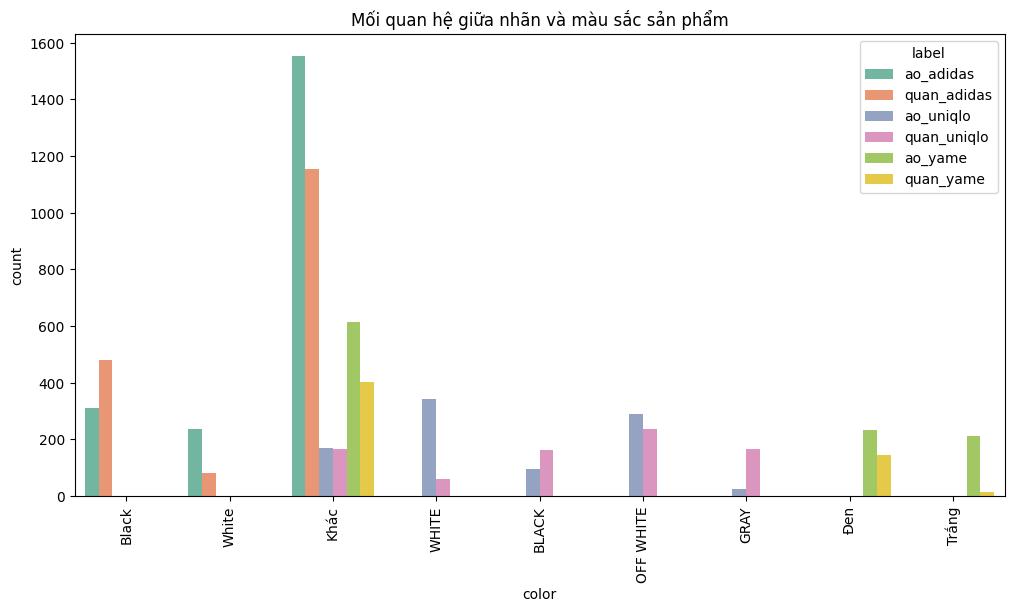

In [83]:
# Mối quan hệ giữa label và color
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='color', hue='label', palette='Set2')
plt.title('Mối quan hệ giữa nhãn và màu sắc sản phẩm')
plt.xticks(rotation=90)
plt.show()



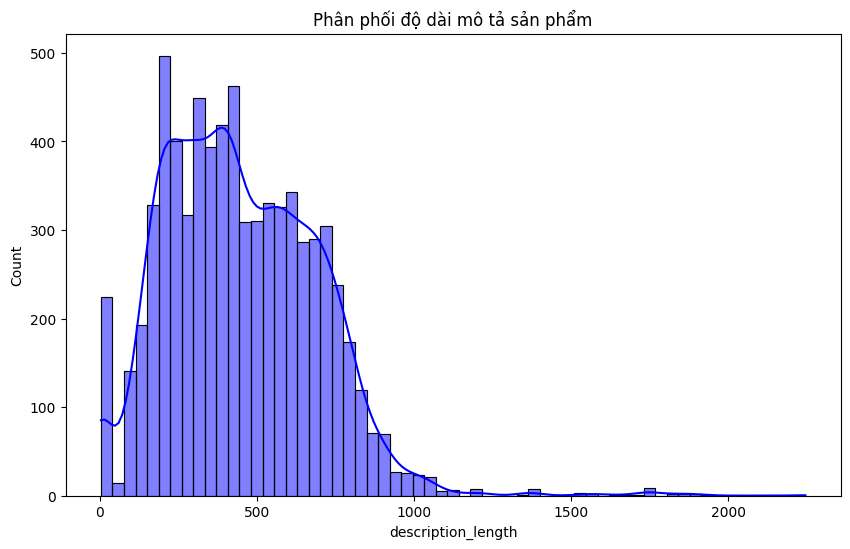

In [84]:
# Tính độ dài của mô tả
df['description_length'] = df['decripsion'].apply(lambda x: len(str(x)))

# Phân phối độ dài mô tả
plt.figure(figsize=(10,6))
sns.histplot(df['description_length'], kde=True, color='blue')
plt.title('Phân phối độ dài mô tả sản phẩm')
plt.show()

